In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,BronchialTree,MaxDose,AtMost,3480,NaN
1,ChestWall,MaxDvh,AtMost,3000,9.33
2,D2CM,MaxDose,AtMost,2400,NaN
3,Esophagus,MaxDvh,AtMost,1880,20.19
4,Esophagus,MaxDose,AtMost,3000,NaN
5,Heart,MaxDvh,AtMost,2800,3.82
6,Heart,MaxDose,AtMost,3400,NaN
7,Lung_Total-GTV,MaxDvh,AtMost,2000,10.00
8,Lung_Total-GTV,MaxDvh,AtMost,1160,85.52
9,PTV,MinDvh,AtLeast,4800,95.00


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,BronchialTree,MaxDose,3480,0.00,NaN,1
1,ChestWall,MaxDvh,3000,9.33,NaN,1
2,D2CM,MaxDose,2400,0.00,NaN,1
3,Esophagus,MaxDvh,1880,20.19,NaN,1
4,Esophagus,MaxDose,3000,0.00,NaN,1
5,Heart,MaxDvh,2800,3.82,NaN,1
6,Heart,MaxDose,3400,0.00,NaN,1
7,Lung_Total-GTV,MaxDvh,2000,10.00,NaN,1
8,Lung_Total-GTV,MaxDvh,1160,85.52,NaN,1
9,PTV,MinDvh,4800,95.00,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,BronchialTree,MaxDose,3480.0,1053.756836,-6.971963e+01
1,ChestWall,MaxDvh,3000.0,2303.594858,-2.321350e+01
2,D2CM,MaxDose,2400.0,2845.247559,1.855198e+01
3,Esophagus,MaxDvh,1880.0,301.945329,-8.393908e+01
4,Esophagus,MaxDose,3000.0,617.847168,-7.940509e+01
5,Heart,MaxDvh,2800.0,560.972956,-7.996525e+01
6,Heart,MaxDose,3400.0,780.766418,-7.703628e+01
7,Lung_Total-GTV,MaxDvh,2000.0,1402.106742,-2.989466e+01
8,Lung_Total-GTV,MaxDvh,1160.0,14.832764,-9.872131e+01
9,PTV,MinDvh,4800.0,4800.000016,3.421312e-07


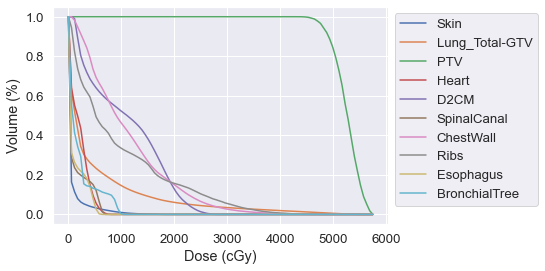

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 667.22, Linear-Quadratic: -535.71
